In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

plt.style.use("seaborn-v0_8")

In [30]:
exports = pd.read_csv("data/API_NE.EXP.GNFS.ZS_DS2_en_csv_v2_1866.csv", skiprows=4)
imports = pd.read_csv("data/API_NE.IMP.GNFS.ZS_DS2_en_csv_v2_133.csv", skiprows=4)


In [31]:
exports = exports[exports["Country Name"] == "Germany"]
imports = imports[imports["Country Name"] == "Germany"]


In [32]:
exports = exports.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Exports"
)

imports = imports.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Imports"
)


In [33]:
exports = exports[exports["Year"].str.isnumeric()]
imports = imports[imports["Year"].str.isnumeric()]

exports["Year"] = exports["Year"].astype(int)
imports["Year"] = imports["Year"].astype(int)


In [34]:
data = pd.merge(exports, imports, on=["Country Name", "Year"])
data = data.sort_values("Year")


In [35]:
data["Trade_Balance"] = data["Exports"] - data["Imports"]


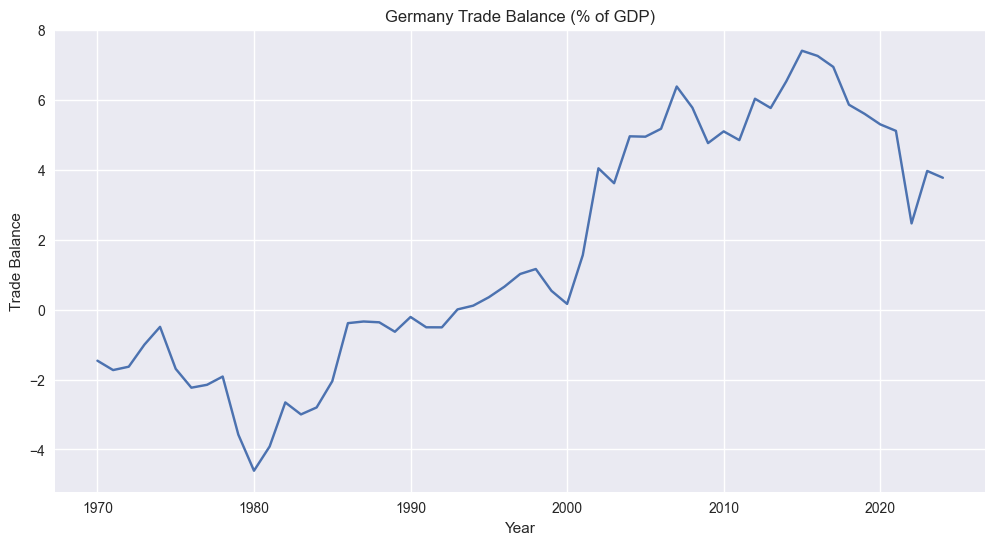

In [36]:
plt.figure(figsize=(12,6))
plt.plot(data["Year"], data["Trade_Balance"])
plt.title("Germany Trade Balance (% of GDP)")
plt.xlabel("Year")
plt.ylabel("Trade Balance")
plt.show()


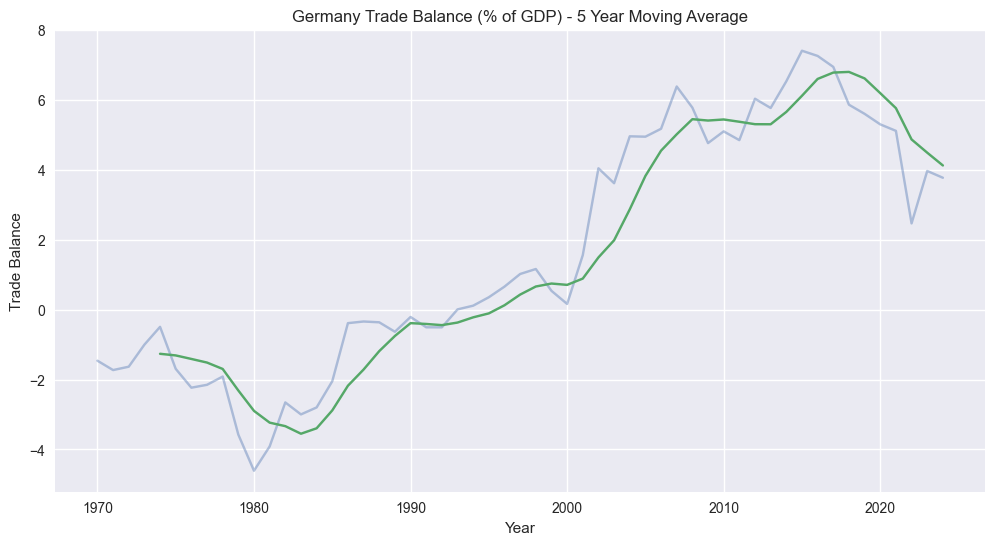

In [38]:
data["TB_5yr_avg"] = data["Trade_Balance"].rolling(5).mean()

plt.figure(figsize=(12,6))
plt.plot(data["Year"], data["Trade_Balance"], alpha=0.4)
plt.plot(data["Year"], data["TB_5yr_avg"])
plt.title("Germany Trade Balance (% of GDP) - 5 Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Trade Balance")
plt.show()


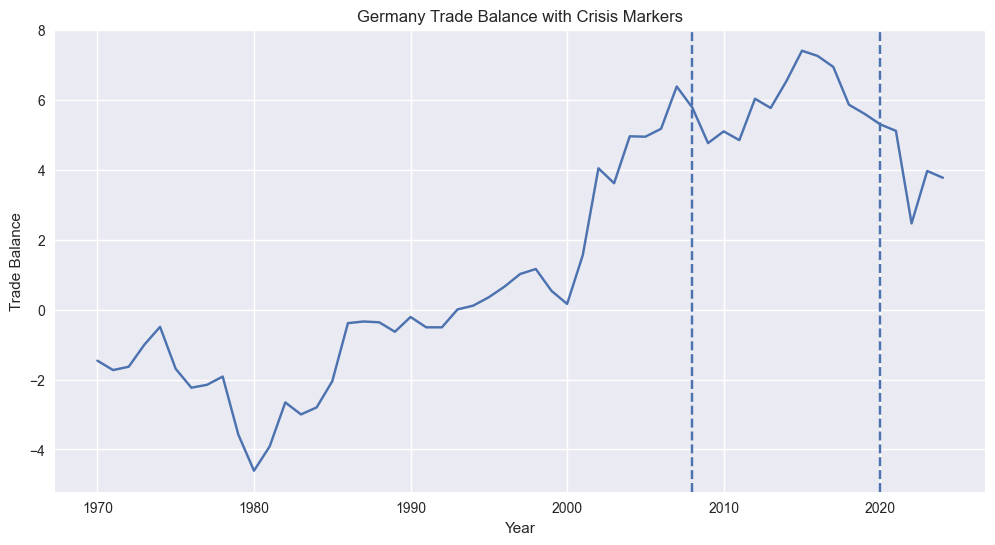

In [39]:
plt.figure(figsize=(12,6))
plt.plot(data["Year"], data["Trade_Balance"])

plt.axvline(2008, linestyle="--")
plt.axvline(2020, linestyle="--")

plt.title("Germany Trade Balance with Crisis Markers")
plt.xlabel("Year")
plt.ylabel("Trade Balance")
plt.show()


Germany exhibits a structurally positive trade balance, particularly after the early 2000s, reflecting its export-oriented economic model. The 2008 global financial crisis caused a temporary contraction in trade surplus; however, recovery was relatively rapid. The period between 2010 and 2018 marks the peak of Germany’s trade surplus. In contrast, the COVID-19 shock in 2020 resulted in a sharp decline, followed by an incomplete recovery.

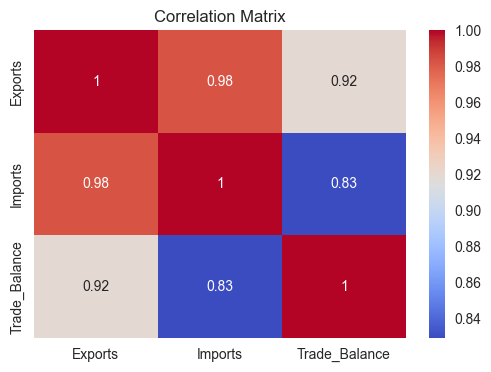

In [40]:
import seaborn as sns

corr = data[["Exports", "Imports", "Trade_Balance"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


The correlation analysis reveals a strong positive relationship between exports and imports (0.98), indicating Germany’s deep integration into global value chains. Additionally, the trade balance shows a strong positive correlation with exports (0.92), suggesting that Germany’s persistent trade surplus is primarily driven by export performance rather than import suppression. The relatively high correlation between imports and trade balance further supports the notion that imports serve as an input for export-oriented production.

In [43]:
reg_data = data[["Exports", "Imports", "Trade_Balance"]].copy()

reg_data = reg_data.dropna()


In [45]:
reg_data["Exports"] = pd.to_numeric(reg_data["Exports"])
reg_data["Imports"] = pd.to_numeric(reg_data["Imports"])
reg_data["Trade_Balance"] = pd.to_numeric(reg_data["Trade_Balance"])


In [46]:
import statsmodels.api as sm

X = reg_data[["Exports", "Imports"]]
y = reg_data["Trade_Balance"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Trade_Balance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.791e+30
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:10:32   Log-Likelihood:                 1692.4
No. Observations:                  55   AIC:                            -3379.
Df Residuals:                      52   BIC:                            -3373.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.109e-15      9e-15      0.345      0.7

In [58]:
gdp_growth = pd.read_csv(
    "data/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_40824.csv",
    skiprows=4
)

gdp_growth.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.08,18.65,12.13,3.96,7.96,5.88,7.31,8.20,2.55,1.19,7.05,1.99,1.24,7.62,4.18,-0.94,1.11,7.29,-0.38,1.13,3.09,1.84,-11.68,-2.73,3.37,-1.04,6.43,1.43,3.61,1.23,3.49,3.21,1.23,-23.90,14.73,10.64,7.71,6.81,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.42,7.94,5.62,4.65,5.14,4.83,5.34,4.16,5.12,1.11,5.48,2.76,4.62,5.47,1.37,2.35,1.11,1.48,2.93,5.45,3.93,0.31,0.06,3.41,-0.09,2.27,3.94,4.29,2.67,0.12,-0.11,-2.40,-0.84,1.92,4.35,5.50,3.86,1.78,2.63,3.18,3.50,3.92,3.01,5.63,6.17,6.64,6.70,4.44,0.92,5.31,4.08,1.90,4.36,3.92,2.93,2.13,2.68,2.71,2.03,-2.82,4.58,3.72,1.93,2.76,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.43,28.60,8.83,1.41,11.23,5.36,13.83,3.92,21.39,14.36,0.43,12.75,5.60,2.72,1.45,2.26,2.65,1.19,3.91,-2.35,-20.74,-6.24,2.27,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.87,3.73,7.04,5.36,4.11,-1.51,-8.97,1.57,15.02,17.31,10.41,3.17,3.92,9.92,-2.01,8.42,4.56,-1.92,5.03,1.87,-6.64,-3.27,-6.29,0.48,5.32,1.27,1.41,4.76,1.72,5.60,1.12,2.29,-1.33,-0.23,1.85,4.62,4.39,3.62,1.52,3.81,5.25,9.94,5.63,8.07,5.80,5.29,5.45,6.21,6.14,7.00,4.92,5.13,6.05,5.69,2.93,0.19,2.30,2.90,3.28,-3.73,2.55,4.47,3.66,4.59,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.40,0.00,4.20,6.00,3.50,2.90,4.08,6.13,0.04,-3.45,0.99,-5.84,-23.98,1.34,15.00,13.54,7.27,4.69,2.18,3.05,4.21,13.67,3.49,11.42,14.15,11.84,13.00,10.79,2.00,5.29,3.59,8.50,4.88,4.66,0.76,-1.70,-0.15,-0.59,-0.20,-4.04,2.10,4.22,1.26,4.42,NaN


In [59]:
gdp_growth = gdp_growth[gdp_growth["Country Name"] == "Germany"]



In [60]:
gdp_growth = gdp_growth.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="GDP_Growth"
)


In [61]:
gdp_growth = gdp_growth[gdp_growth["Year"].str.isnumeric()]
gdp_growth["Year"] = gdp_growth["Year"].astype(int)


In [62]:
gdp_growth.head()


,Country Name,Year,GDP_Growth
3,Germany,1960,NaN
4,Germany,1961,4.30
5,Germany,1962,4.62
6,Germany,1963,2.74
7,Germany,1964,6.64


In [63]:
data = data.merge(
    gdp_growth[["Year", "GDP_Growth"]],
    on="Year",
    how="left"
)


In [64]:
data[["Year", "Trade_Balance", "GDP_Growth"]].head(10)


,Year,Trade_Balance,GDP_Growth
0,1960,NaN,NaN
1,1961,NaN,4.30
2,1962,NaN,4.62
3,1963,NaN,2.74
4,1964,NaN,6.64
5,1965,NaN,5.24
6,1966,NaN,2.81
7,1967,NaN,-0.33
8,1968,NaN,5.67
9,1969,NaN,7.42


In [66]:
reg_data2 = data[["Year", "GDP_Growth", "Trade_Balance"]].copy()


In [67]:
reg_data2["GDP_Growth"] = pd.to_numeric(reg_data2["GDP_Growth"], errors="coerce")
reg_data2["Trade_Balance"] = pd.to_numeric(reg_data2["Trade_Balance"], errors="coerce")


In [68]:
reg_data2 = reg_data2.dropna()


In [69]:
reg_data2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 10 to 64
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           55 non-null     int64  
 1   GDP_Growth     55 non-null     float64
 2   Trade_Balance  55 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


In [ ]:
import statsmodels.api as sm

X = reg_data[["Exports", "Imports"]]
y = reg_data["Trade_Balance"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Trade_Balance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.791e+30
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:10:32   Log-Likelihood:                 1692.4
No. Observations:                  55   AIC:                            -3379.
Df Residuals:                      52   BIC:                            -3373.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.109e-15      9e-15      0.345      0.7

In [74]:
import statsmodels.api as sm

# Regresyon için temiz veri
reg_data2 = data[["Year", "GDP_Growth", "Trade_Balance"]].copy()

reg_data2["GDP_Growth"] = pd.to_numeric(reg_data2["GDP_Growth"], errors="coerce")
reg_data2["Trade_Balance"] = pd.to_numeric(reg_data2["Trade_Balance"], errors="coerce")

reg_data2 = reg_data2.dropna()
reg_data2 = reg_data2.reset_index(drop=True)

# Model
X = reg_data2[["GDP_Growth"]]
y = reg_data2["Trade_Balance"]

X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()

model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Trade_Balance   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.445
Date:                Thu, 05 Feb 2026   Prob (F-statistic):             0.0397
Time:                        00:51:03   Log-Likelihood:                -143.64
No. Observations:                  55   AIC:                             291.3
Df Residuals:                      53   BIC:                             295.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4407      0.606      4.028      0.000       1.225       3.656
GDP_Growth    -0.4541      0.215     -2.108      0.040      -0.886      -0.022
==============================================================================
Omnibus:                        5.079   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                2.286
Skew:                           0.167   Prob(JB):                        0.319
Kurtosis:                       2.059   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

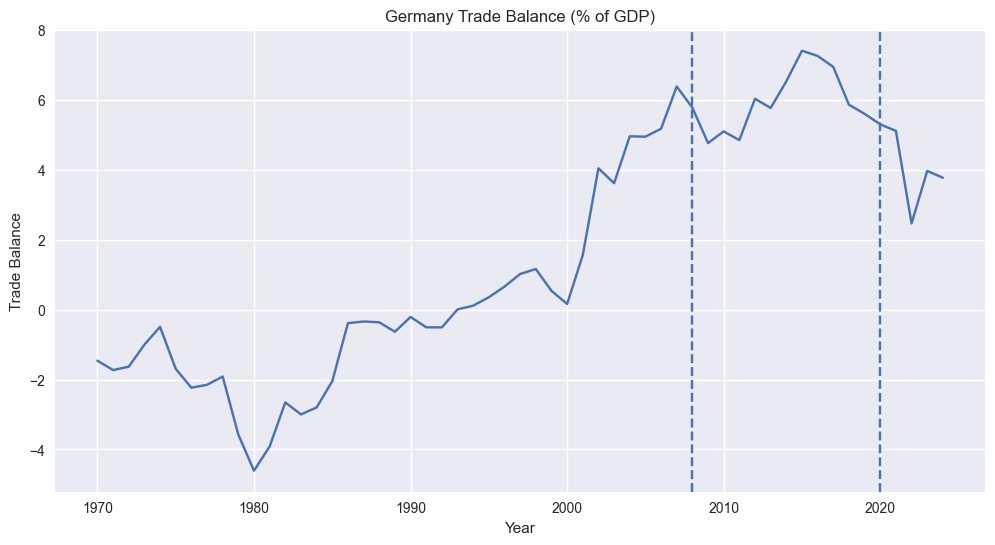

In [75]:
plt.figure(figsize=(12,6))
plt.plot(data["Year"], data["Trade_Balance"])
plt.axvline(2008, linestyle="--")
plt.axvline(2020, linestyle="--")
plt.title("Germany Trade Balance (% of GDP)")
plt.xlabel("Year")
plt.ylabel("Trade Balance")

plt.savefig("outputs/germany_trade_balance.png", dpi=300, bbox_inches="tight")
plt.show()
